In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib import rc
import matplotlib.font_manager
from sklearn.decomposition import PCA
from sklearn import preprocessing
import glob
from functools import reduce

In [2]:
paths = glob.glob("../results/Input_WAGO-3_A/potential_umis/*/counts.tsv")

In [3]:
paths

['../results/Input_WAGO-3_A/potential_umis/7/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/6/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/11/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/19/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/14/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/17/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/5/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/13/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/16/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/20/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/9/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/12/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/15/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/10/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/8/counts.tsv',
 '../results/Input_WAGO-3_A/potential_umis/18/counts.tsv']

In [4]:
samples = {}

In [5]:
dfs = []
for path in paths:
    sample_name = path.split("/")[2]
    kmer = path.split("/")[4]
    samples[sample_name] = path
    print(f"Working on {sample_name} with kmer {kmer}")
    df = pd.read_csv(path, header=0, sep="\t")
    df.set_index("potential_umi", inplace=True)
    df.columns = [sample_name+ "_kmer_" + kmer]
    dfs.append(df)

Working on Input_WAGO-3_A with kmer 7
Working on Input_WAGO-3_A with kmer 6
Working on Input_WAGO-3_A with kmer 11
Working on Input_WAGO-3_A with kmer 19
Working on Input_WAGO-3_A with kmer 14
Working on Input_WAGO-3_A with kmer 17
Working on Input_WAGO-3_A with kmer 5
Working on Input_WAGO-3_A with kmer 13
Working on Input_WAGO-3_A with kmer 16
Working on Input_WAGO-3_A with kmer 20
Working on Input_WAGO-3_A with kmer 9
Working on Input_WAGO-3_A with kmer 12
Working on Input_WAGO-3_A with kmer 15
Working on Input_WAGO-3_A with kmer 10
Working on Input_WAGO-3_A with kmer 8
Working on Input_WAGO-3_A with kmer 18


In [6]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='potential_umi', how="outer"), dfs)

In [7]:
df_final.head()

,Input_WAGO-3_A_kmer_7,Input_WAGO-3_A_kmer_6,Input_WAGO-3_A_kmer_11,Input_WAGO-3_A_kmer_19,Input_WAGO-3_A_kmer_14,Input_WAGO-3_A_kmer_17,Input_WAGO-3_A_kmer_5,Input_WAGO-3_A_kmer_13,Input_WAGO-3_A_kmer_16,Input_WAGO-3_A_kmer_20,Input_WAGO-3_A_kmer_9,Input_WAGO-3_A_kmer_12,Input_WAGO-3_A_kmer_15,Input_WAGO-3_A_kmer_10,Input_WAGO-3_A_kmer_8,Input_WAGO-3_A_kmer_18
potential_umi,,,,,,,,,,,,,,,,
CCCCCCC,6315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGCCCCC,6033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCGCCCC,4649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCCCCCC,4351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAA,4255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
kmers = list(np.arange(5,21))

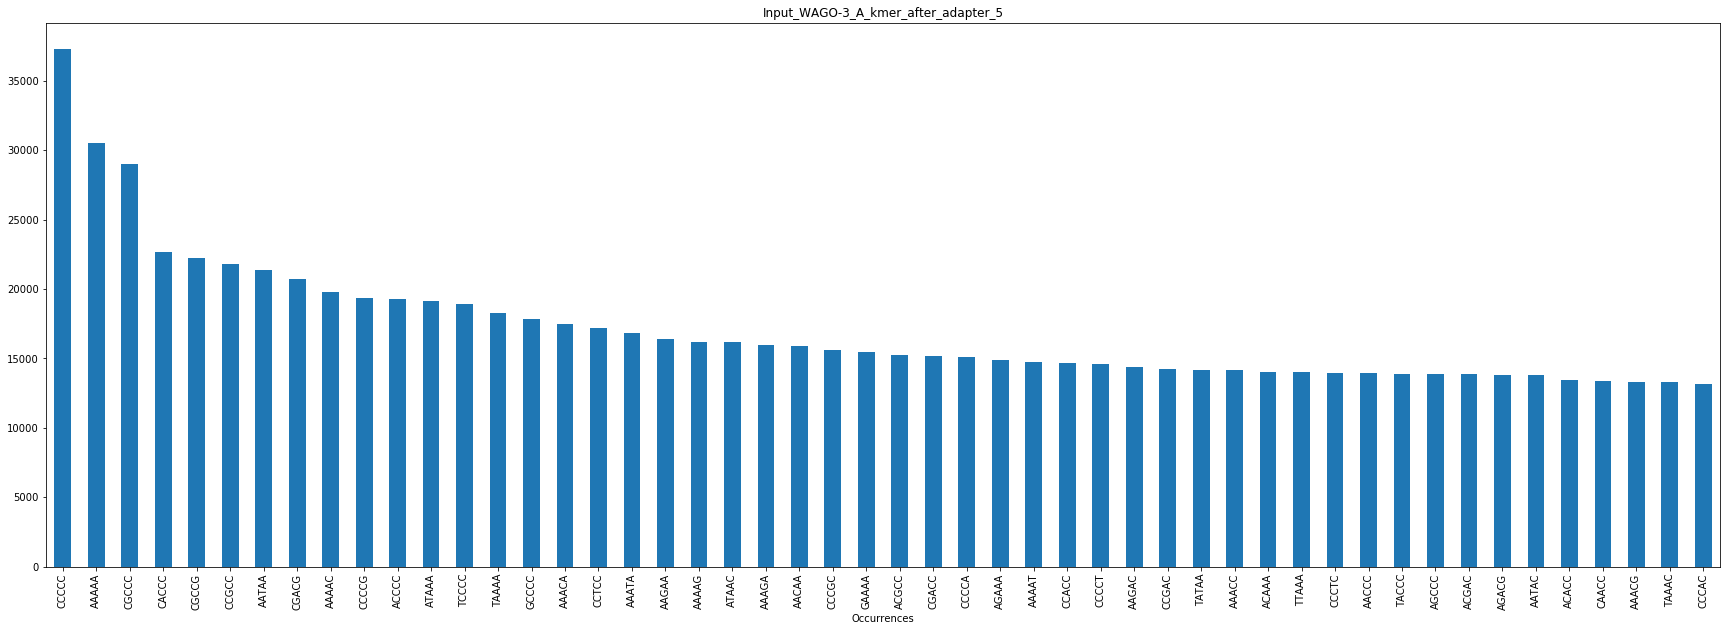

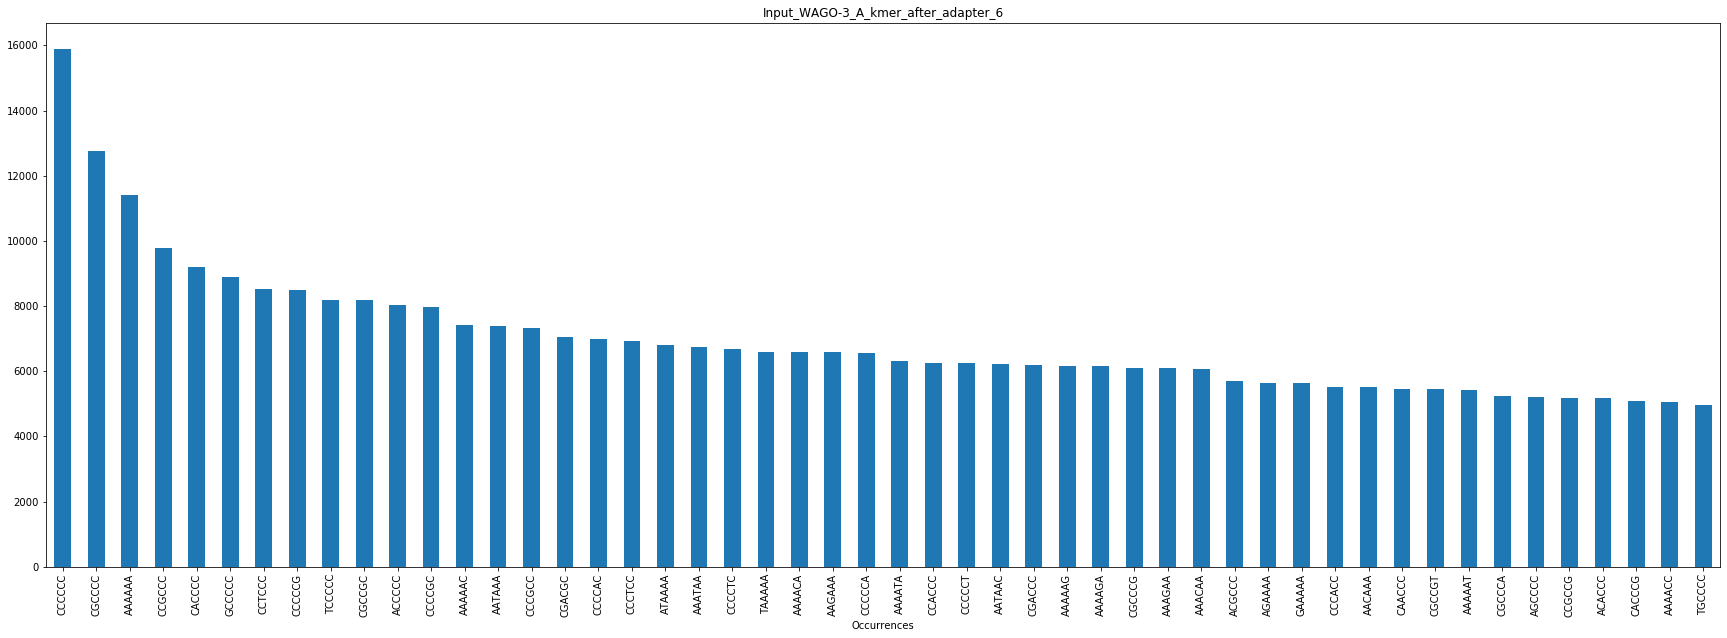

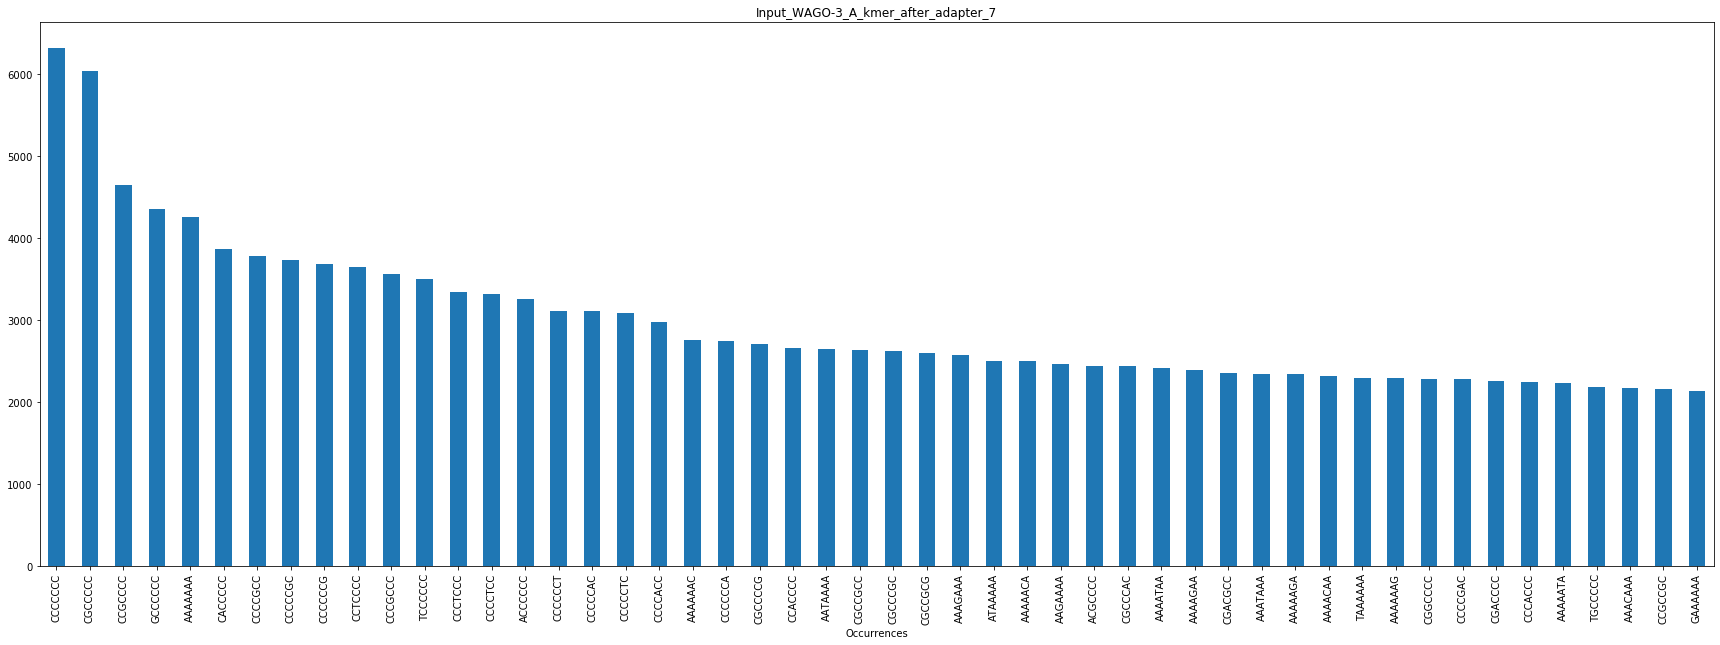

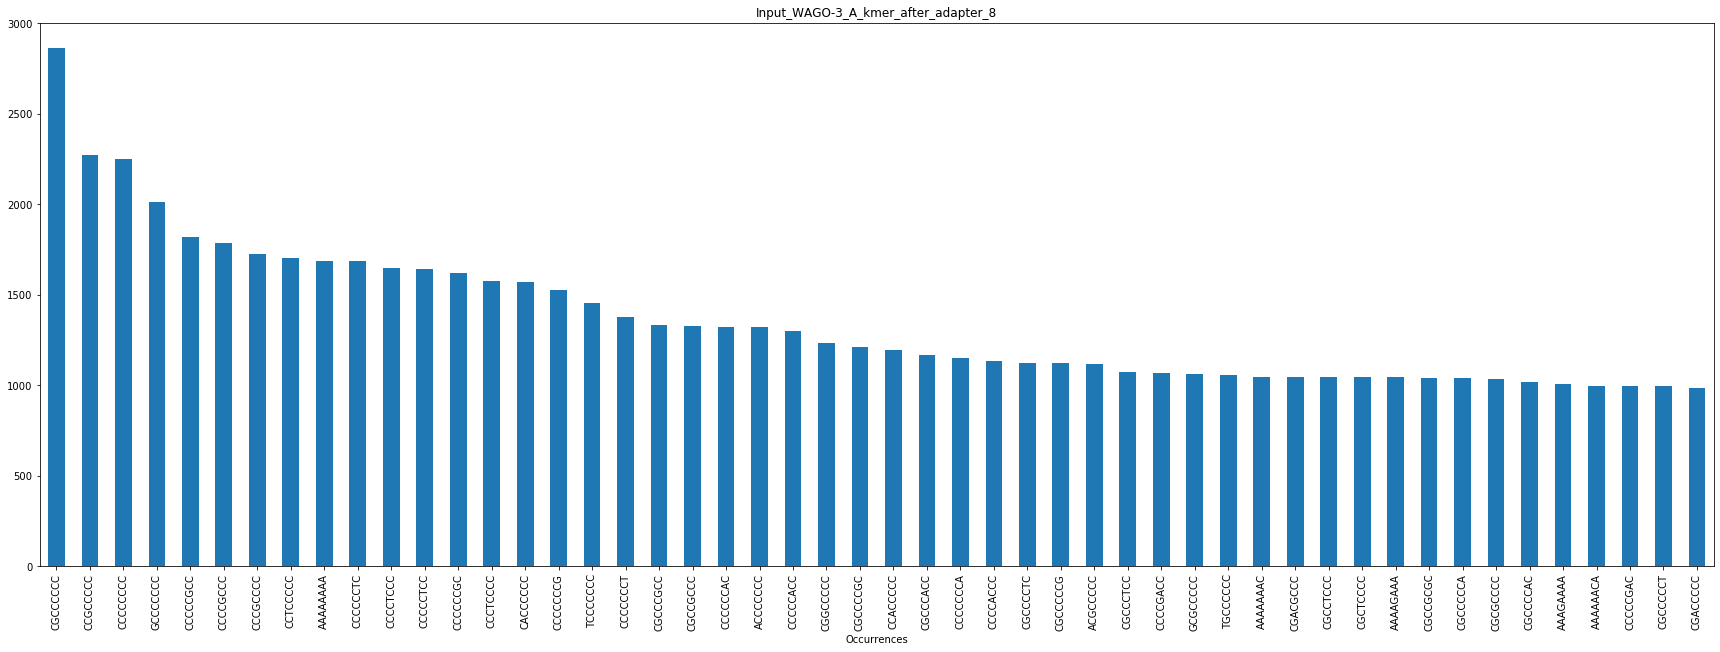

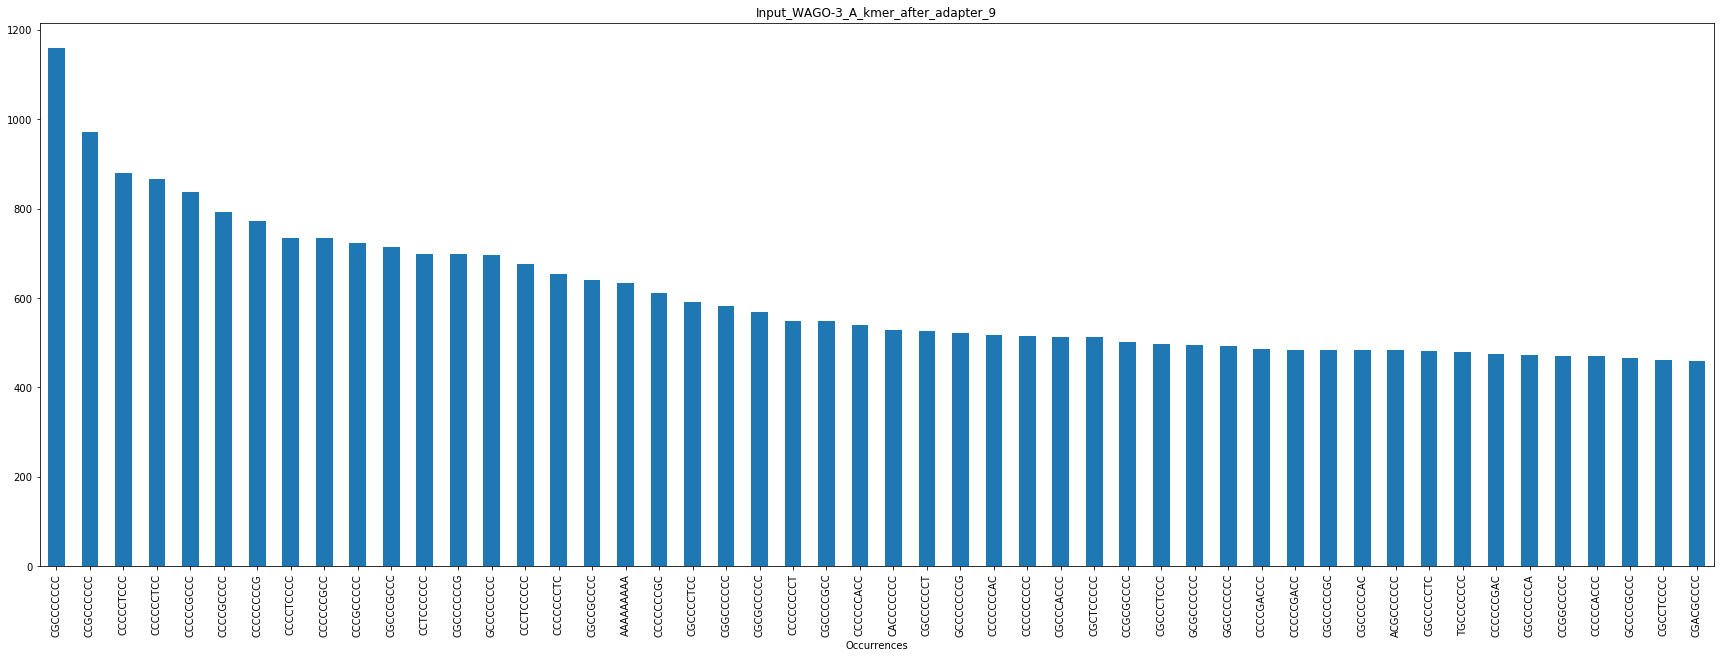

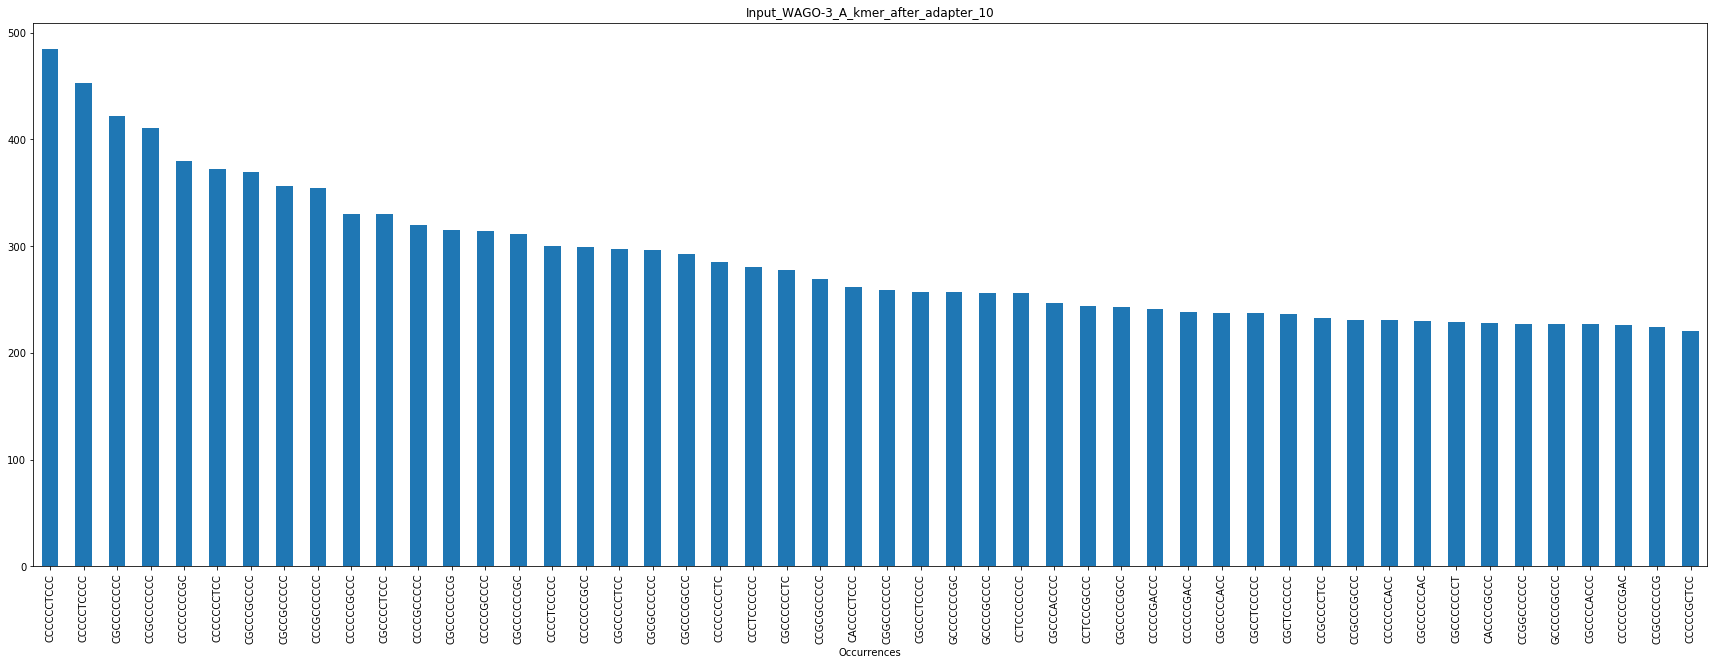

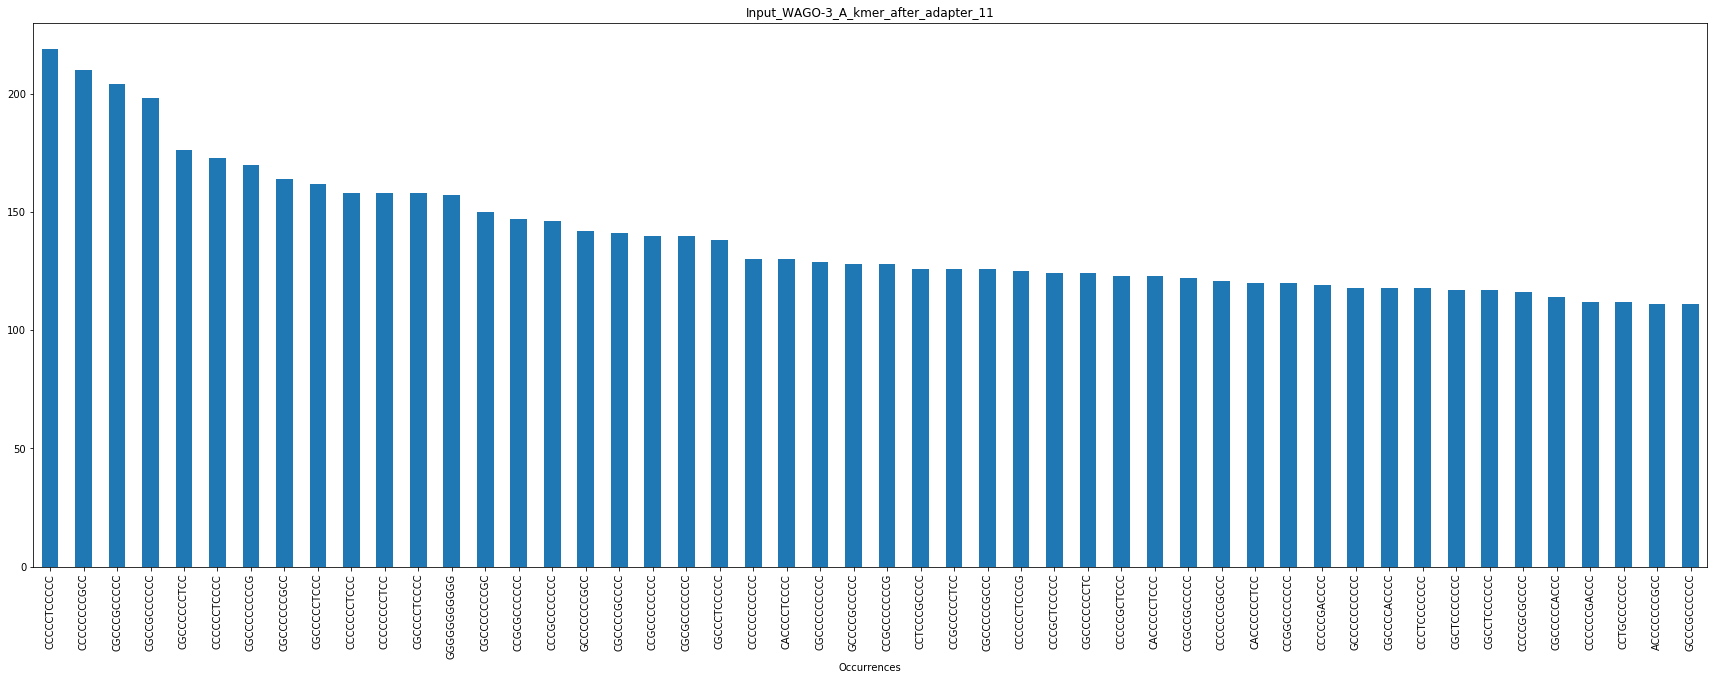

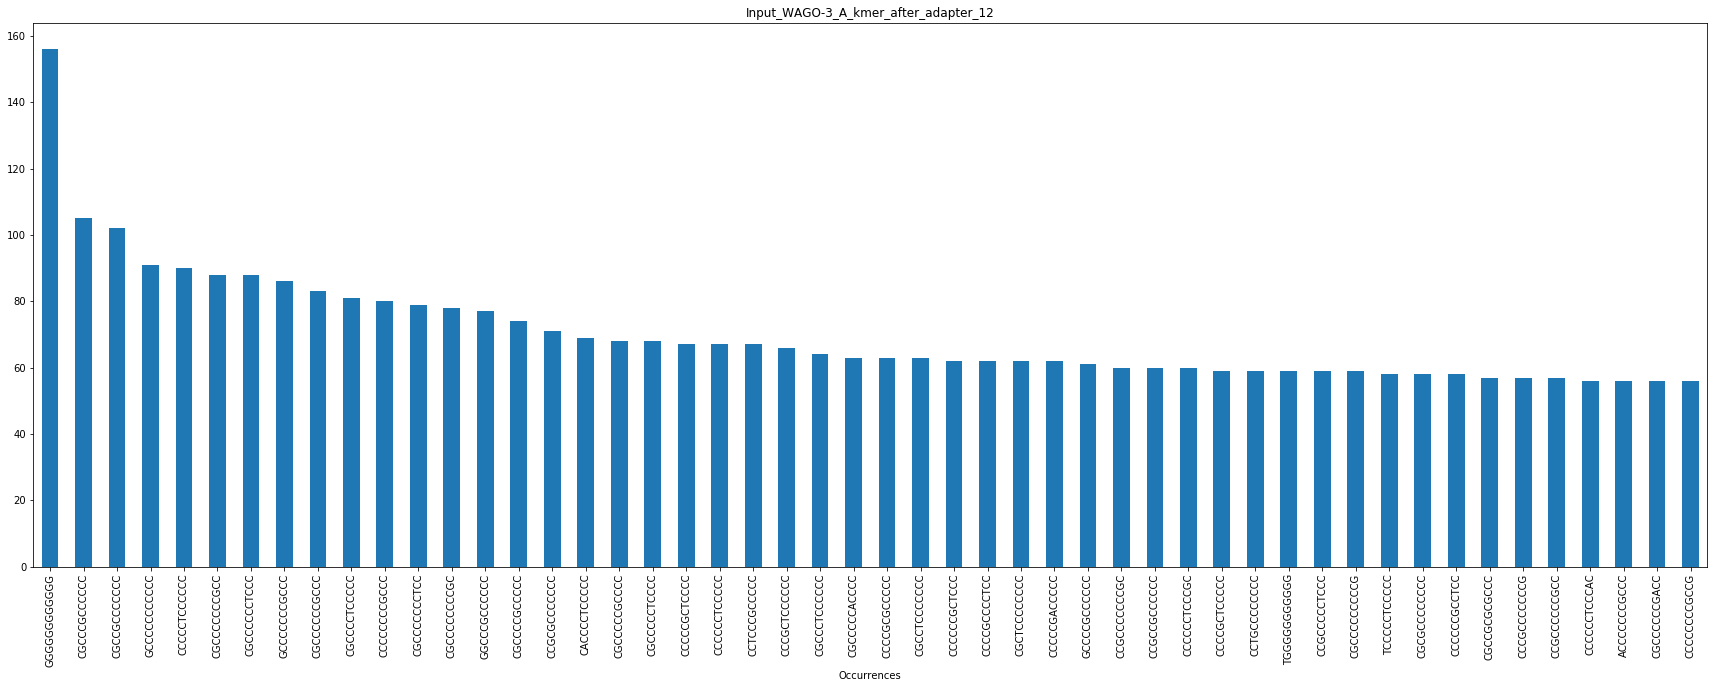

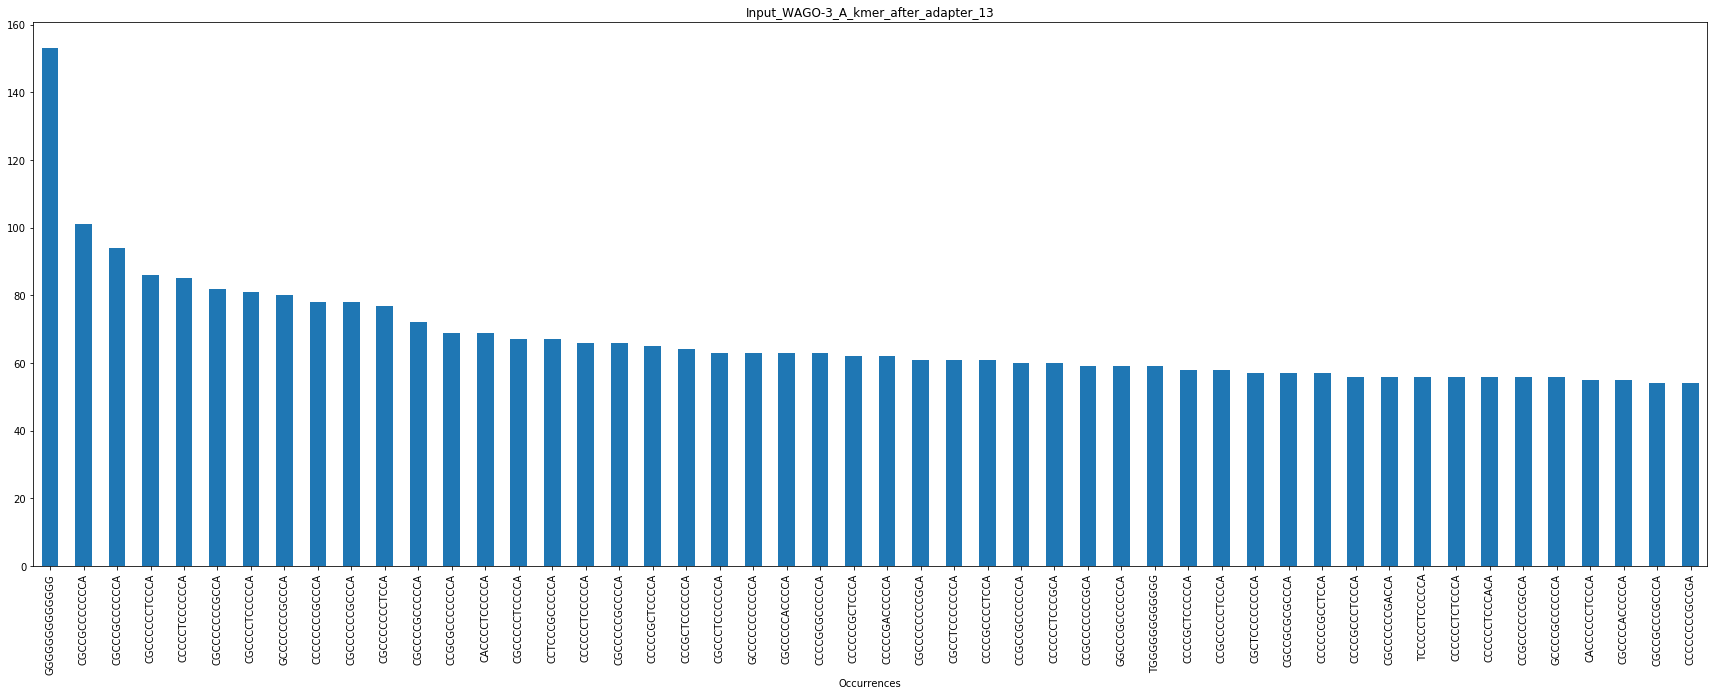

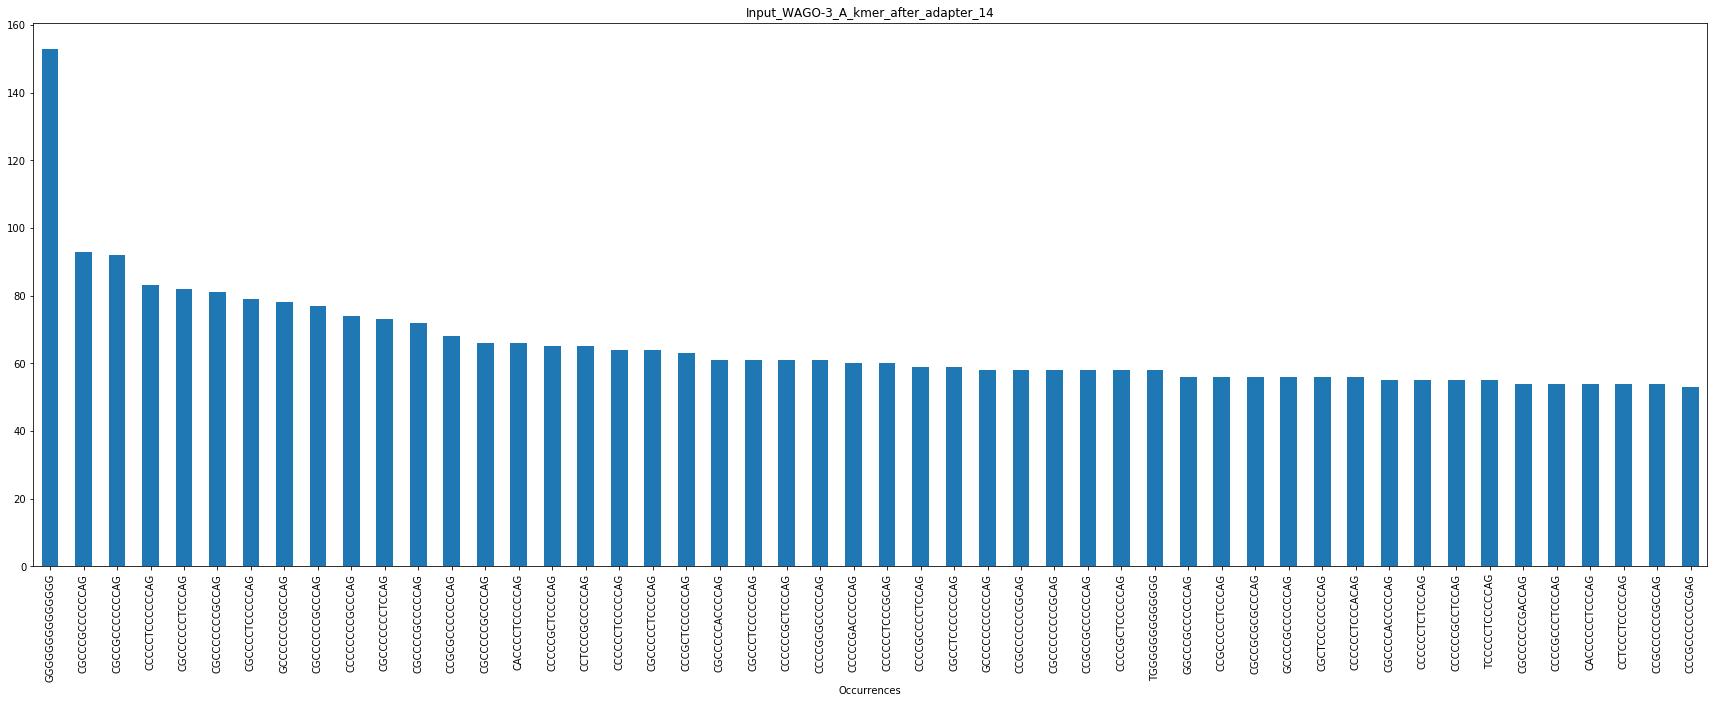

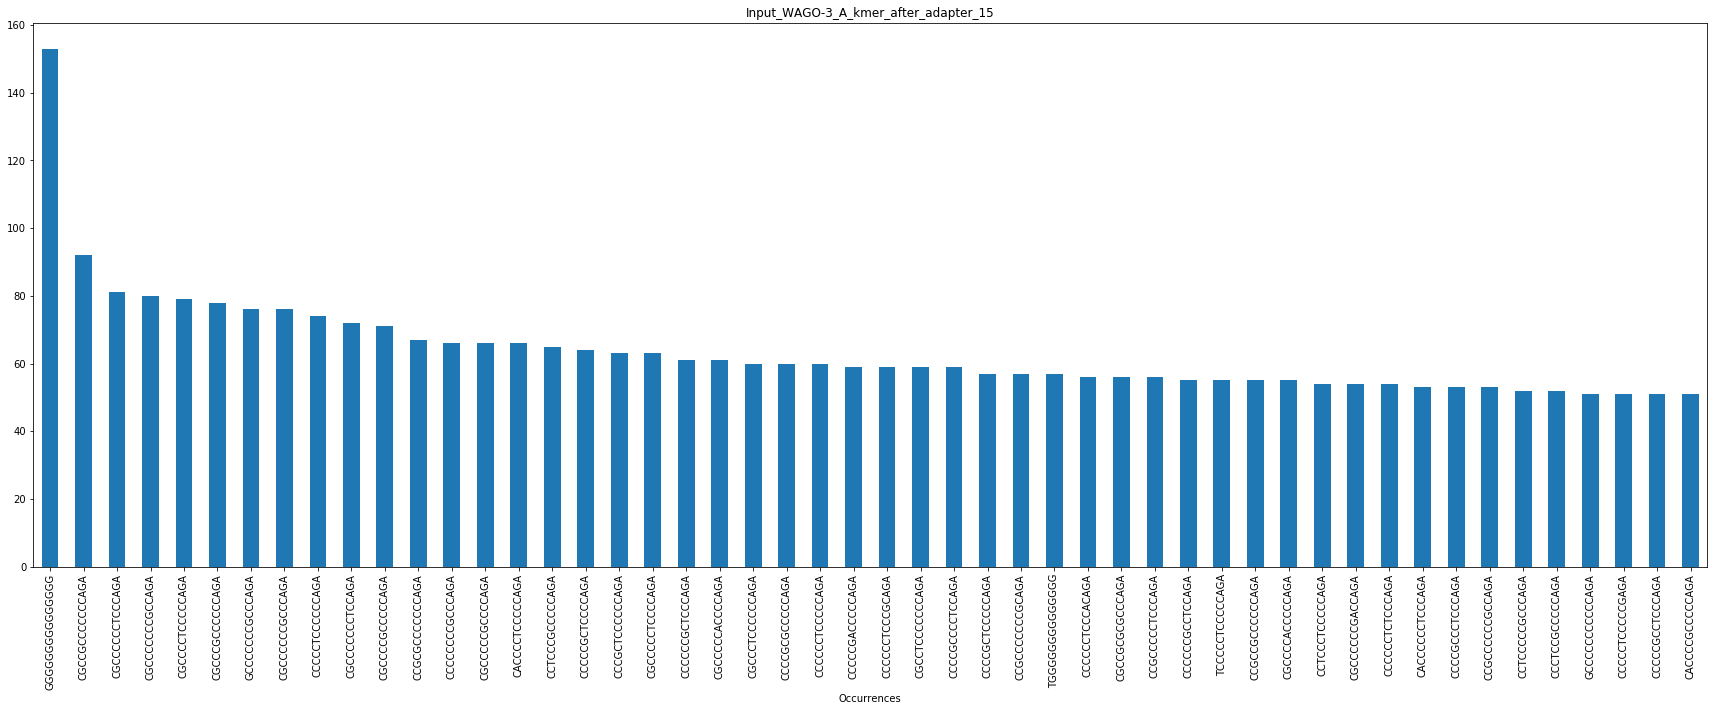

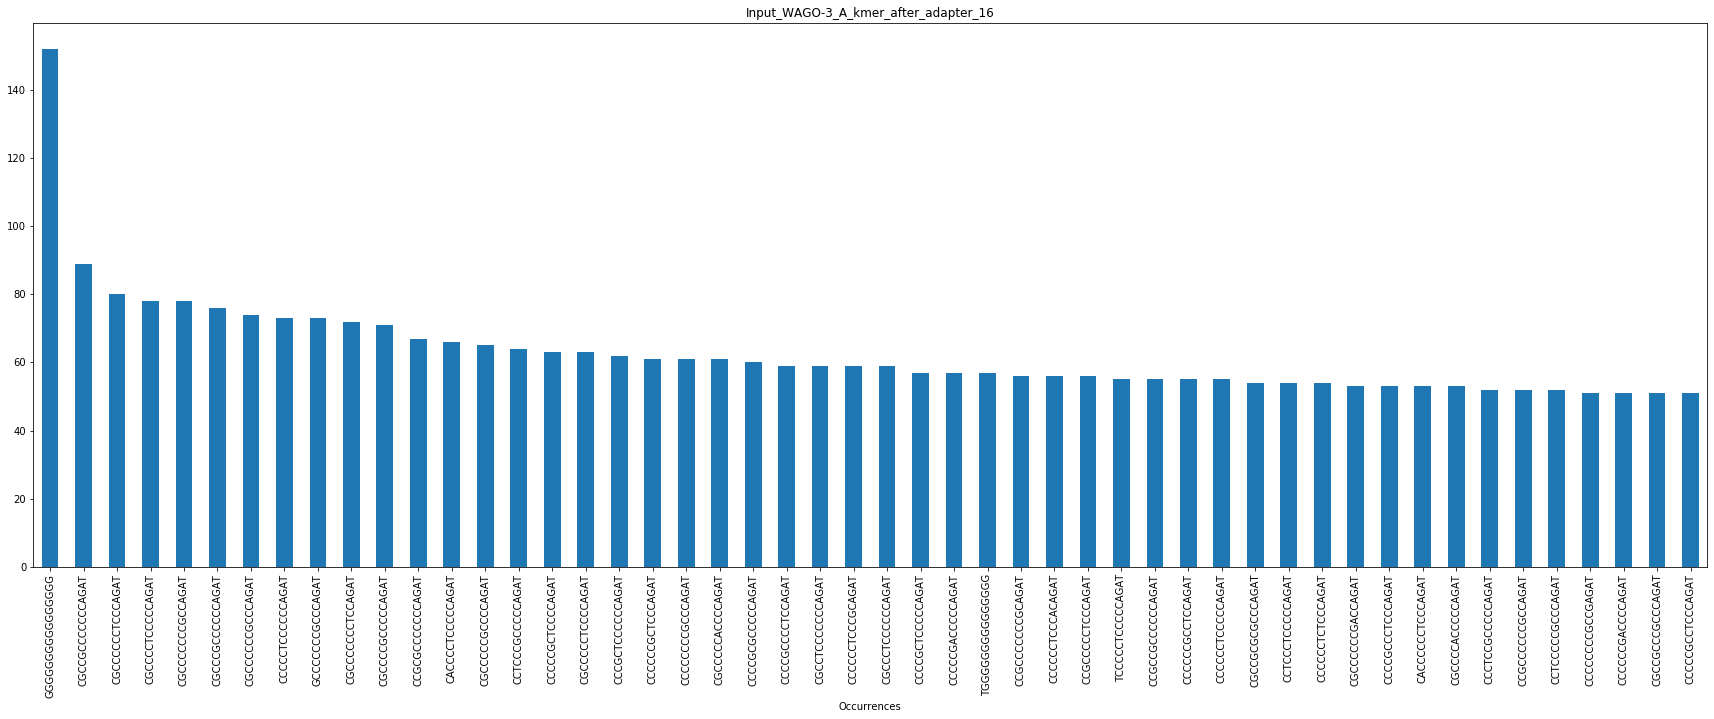

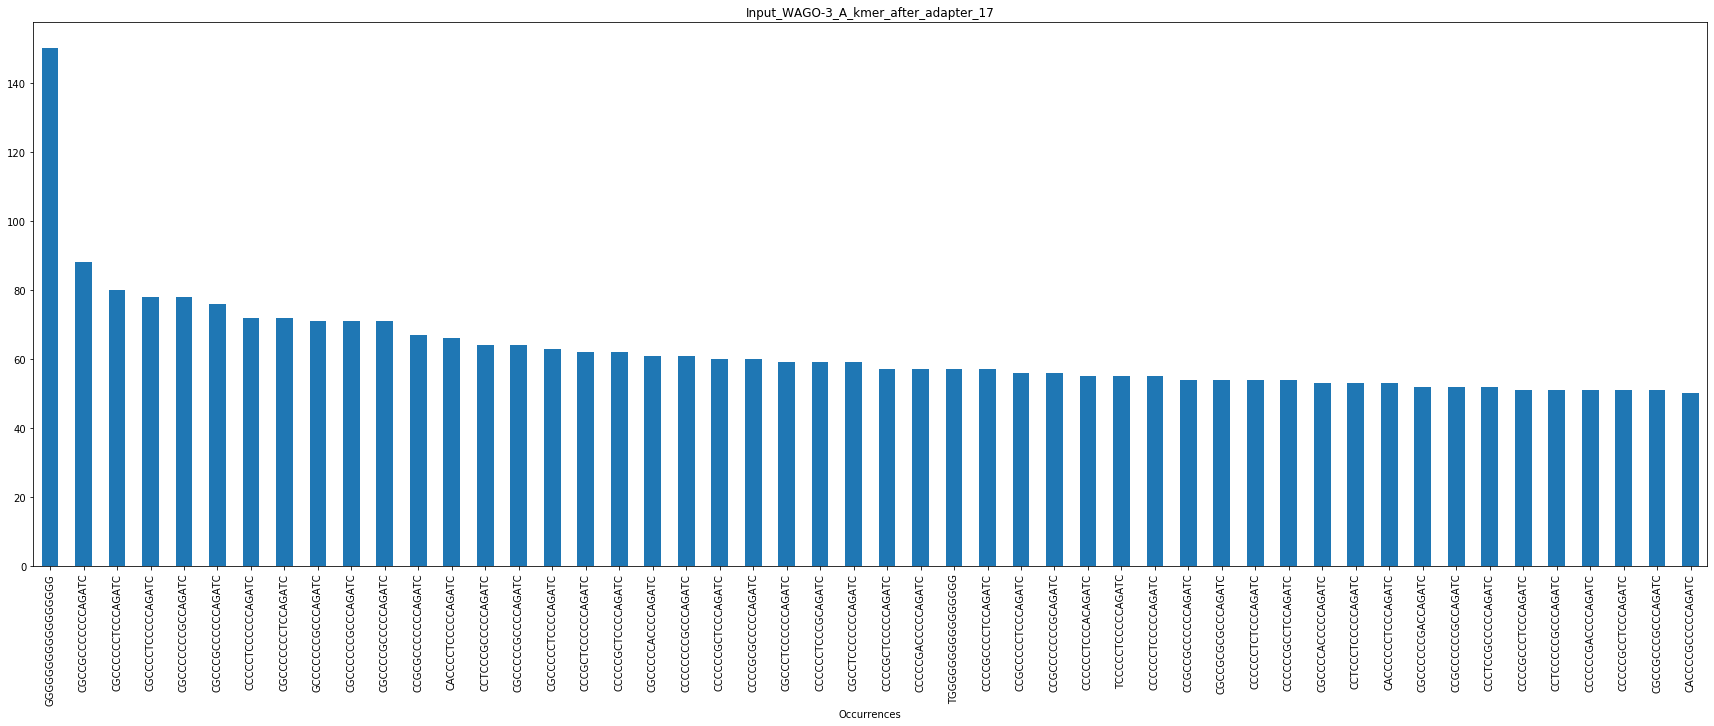

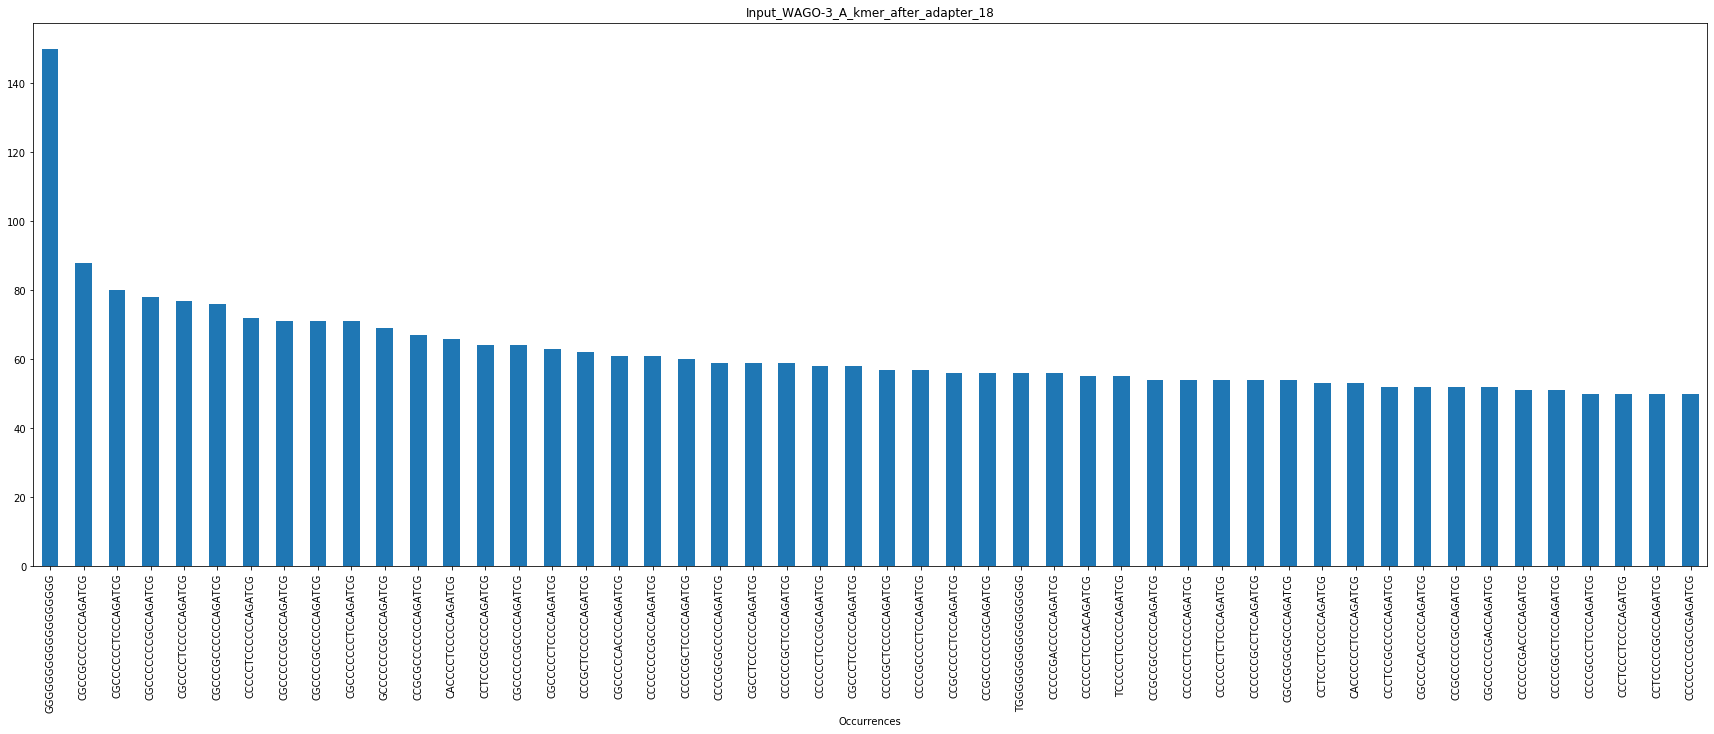

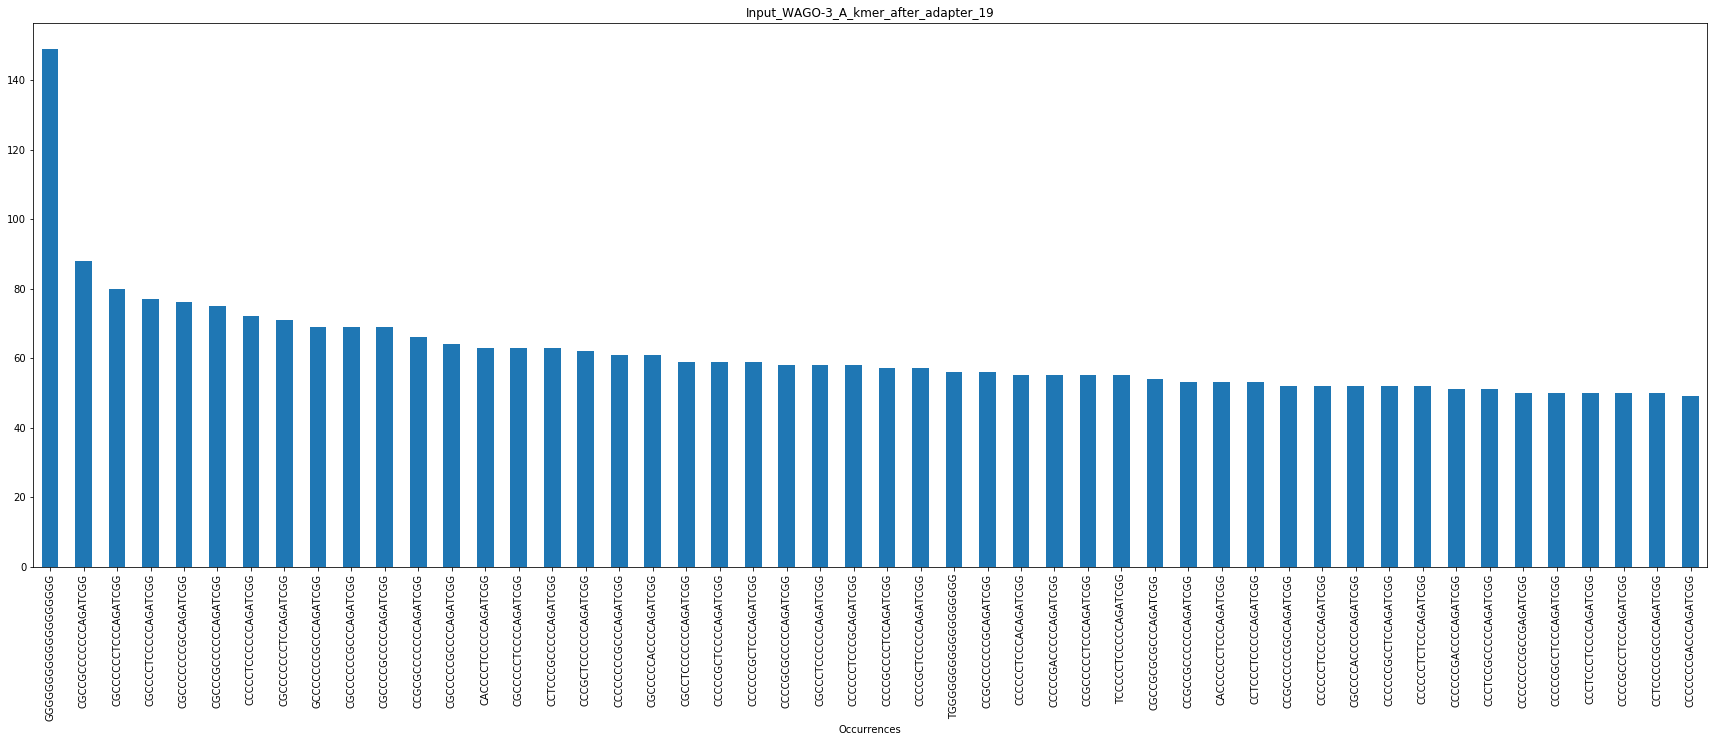

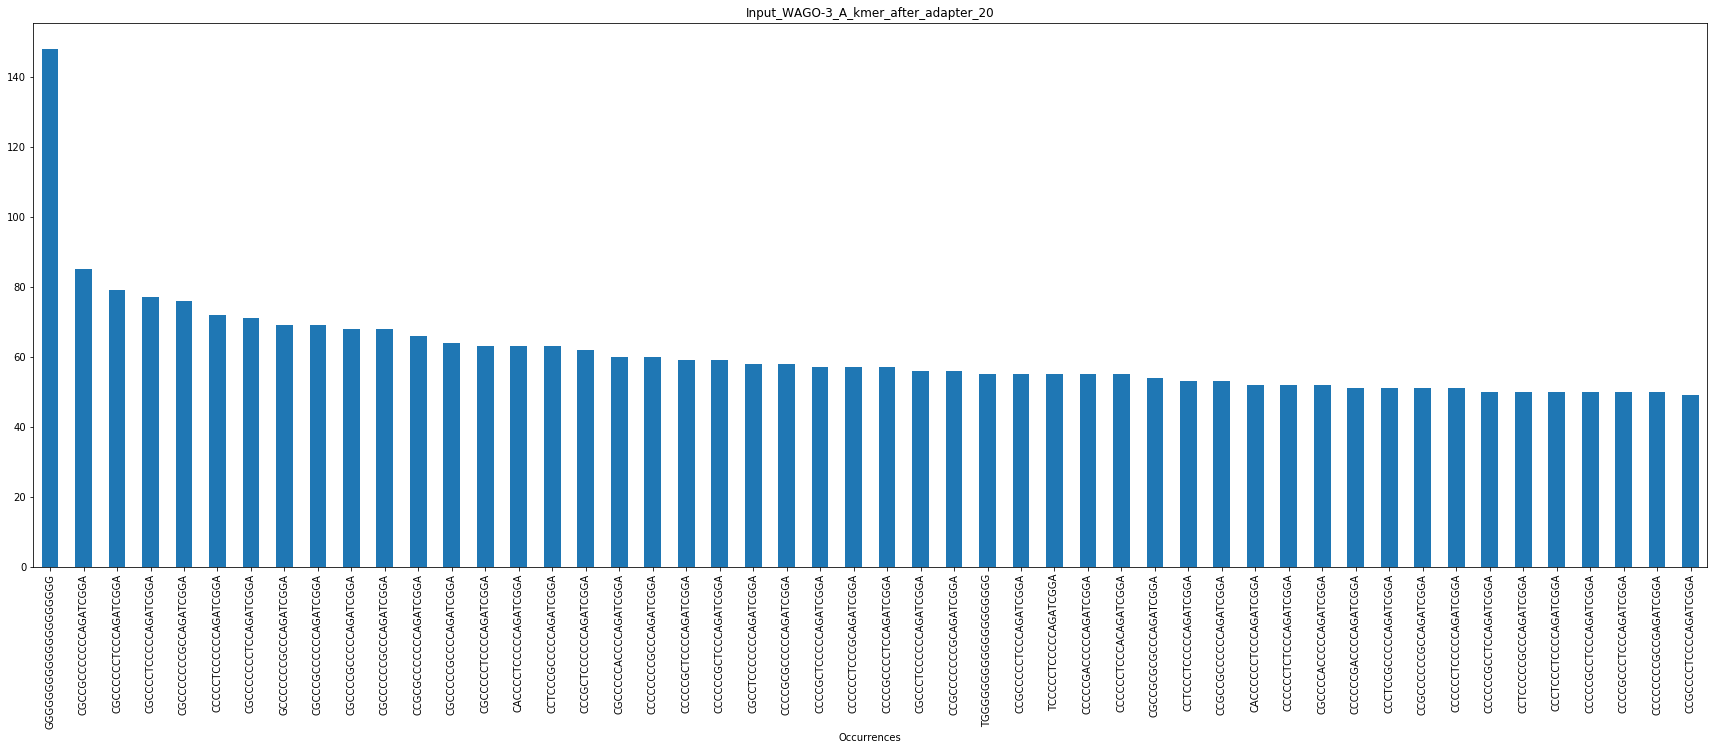

In [9]:
for kmer in kmers:
    top_n = df_final[f"Input_WAGO-3_A_kmer_{str(kmer)}"].nlargest(50)
    plt.figure(figsize=(30,10))
    top_n.plot(kind="bar")
    plt.title(f"Input_WAGO-3_A_kmer_after_adapter_{str(kmer)}")
    plt.xlabel("Potential umis")
    plt.xlabel("Occurrences")

# Alternative approach

In [10]:
df = pd.read_csv("../results/Input_WAGO-3_A/frequency_for_UMI_detection/frequency.tsv", header=0, sep="\t", index_col=0)

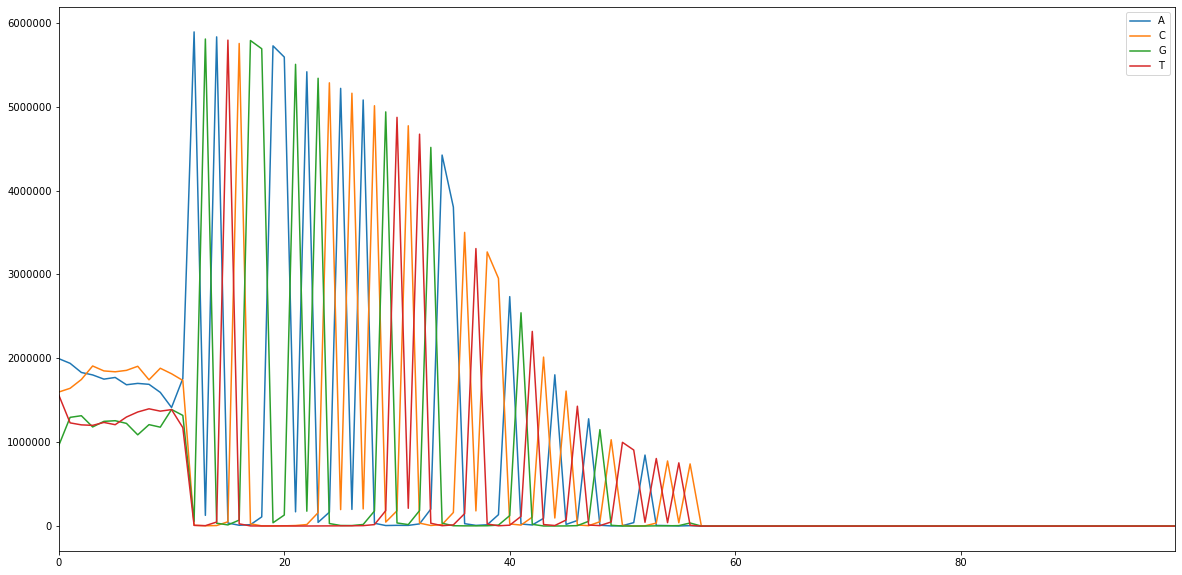

In [11]:
df.plot(figsize=(20,10))

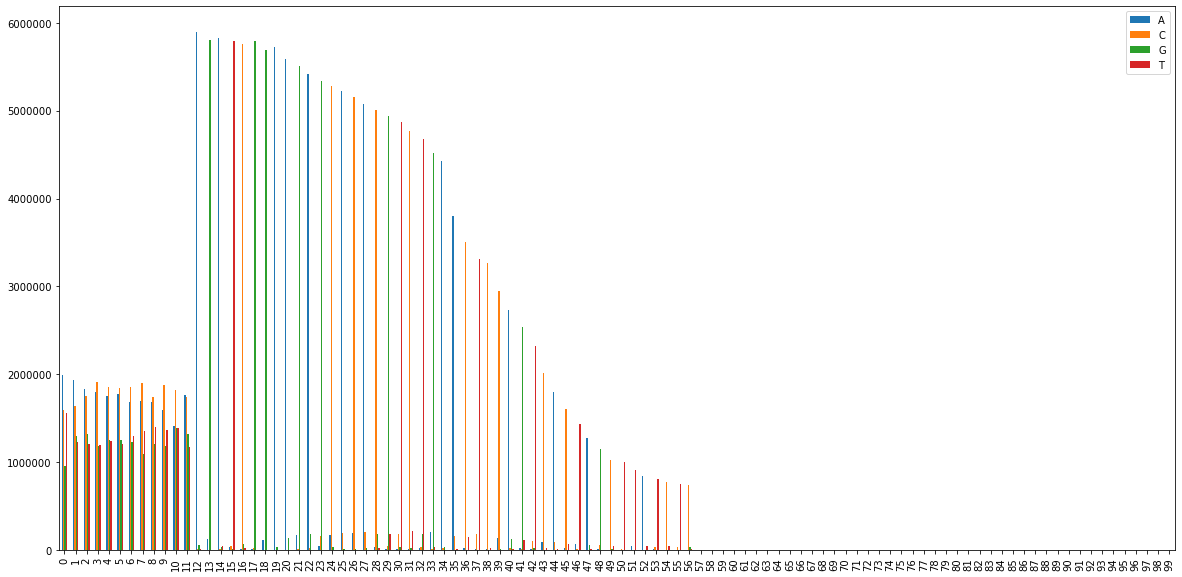

In [12]:
df.plot(figsize=(20,10), kind="bar")

# Stats

In [15]:
df = pd.read_csv("../results/Input_WAGO-3_A/split_reads/stats.tsv", header=0, sep="\t")

In [16]:
df

,category,number_of_reads
0,adapter_missing,949314
1,umi_truncated,135910
2,adapter_and_umi_present,5988948
